In [317]:
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [318]:
data.shape

(891, 12)

In [319]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
data.isin(['?']).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [322]:
data.shape

(891, 12)

In [323]:
data = data.drop(columns=['Cabin', 'PassengerId', 'Ticket', 'Name']) 
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [324]:
#Import label encoder and encode columns('Sex'. 'Embarked')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Sex']= label_encoder.fit_transform(data['Sex']) 

In [325]:
data['Embarked'] = data['Embarked'].replace(['C','Q','S'],['Embk_Cherbourg','Embk_Queenstown','Embk_Southampton'])

In [326]:
Embarked_town = pd.get_dummies(data.Embarked)
Embarked_town.head()

,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [327]:
data = data.join(Embarked_town).drop('Embarked', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [328]:
data.Age.fillna(data.Age.mean(),inplace=True)
data.Age.isnull().sum()

0

In [329]:
data.Fare.fillna(data.Fare.mean(),inplace=True)
data.Fare.isnull().sum()

0

In [330]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [331]:
data.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embk_Cherbourg      0
Embk_Queenstown     0
Embk_Southampton    0
dtype: int64

In [332]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [333]:
data.shape


(891, 10)

<AxesSubplot:xlabel='Embk_Queenstown', ylabel='Survived'>

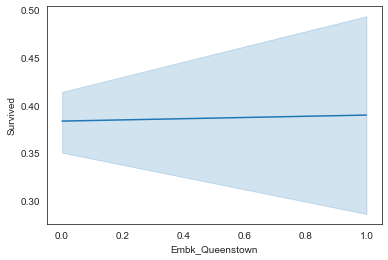

In [334]:
sns.lineplot(data=data, x="Embk_Queenstown", y="Survived")

In [335]:
sorted(data)

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Survived             1.0000
Pclass               1.0000
Sex                  1.0000
Age                 13.0000
SibSp                1.0000
Parch                0.0000
Fare                23.0896
Embk_Cherbourg       0.0000
Embk_Queenstown      0.0000
Embk_Southampton     1.0000
dtype: float64


In [336]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embk_Cherbourg,Embk_Queenstown,Embk_Southampton
0,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,1,1,54.0,0,0,51.8625,0,0,1
...,...,...,...,...,...,...,...,...,...,...
882,0,3,0,22.0,0,0,10.5167,0,0,1
883,0,2,1,28.0,0,0,10.5000,0,0,1
884,0,3,1,25.0,0,0,7.0500,0,0,1
886,0,2,1,27.0,0,0,13.0000,0,0,1


In [337]:
for i in data.Fare:
    print(i)
    break

7.25


In [338]:
for i in data.Age:
    print(i)
    break

22.0


In [339]:
data.shape

(433, 10)

In [340]:
X = data.drop(['Survived'], axis=1).values
y = data['Survived'].values

#X = data.iloc[:, 1:10]
#y = data.iloc[:, 0]

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [399]:
X_train.shape

(303, 9)

In [400]:
y_train.shape

(303,)

In [401]:
model = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(solver="liblinear", random_state=42))
cross_val_score(model, X, y, cv=5)

array([0.70114943, 0.77011494, 0.77011494, 0.86046512, 0.81395349])

In [402]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [403]:
print("Accuracy of train:", model.score(X_train,y_train))
print("Accuracy of test:", model.score(X_test,y_test))

Accuracy of train: 0.8052805280528053
Accuracy of test: 0.7923076923076923


In [404]:
#Visulaising confusion matrix
cm = confusion_matrix(y_train, model.predict(X_train))
cm

array([[187,  29],
       [ 30,  57]], dtype=int64)

In [405]:
#Predicts probabilities
data=pd.DataFrame(model.predict_proba(X_test)).head(10)
data

,0,1
0,0.910295,0.089705
1,0.906686,0.093314
2,0.222057,0.777943
3,0.909734,0.090266
4,0.910086,0.089914
5,0.910129,0.089871
6,0.362433,0.637567
7,0.826773,0.173227
8,0.909693,0.090307
9,0.905072,0.094928


In [406]:
model.predict(X_test[0:10])

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

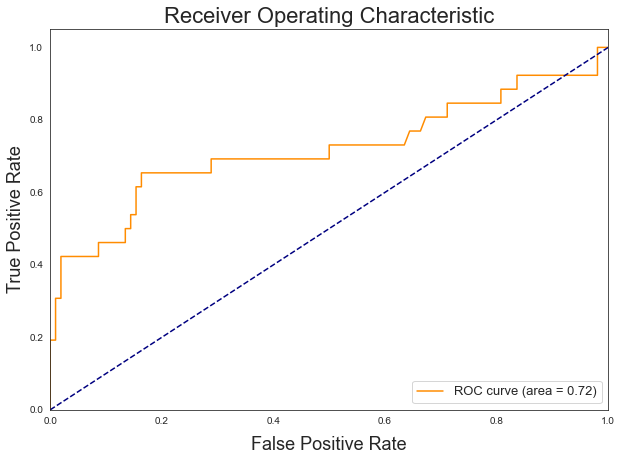

In [407]:
#Area under the roc curve measures the performance of the model. ROC curve above 0.50 shows good performace.
from sklearn.metrics import roc_curve, auc

y_pred_prop = model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# Decison Tree Algorithm

In [378]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4)

In [379]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [380]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [381]:
print ('Accuracy Score is: ', accuracy_score(y_test, y_pred)*100)

Accuracy Score is:  82.3076923076923


# Random Forest Algorithm

In [470]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=42)

In [471]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [472]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [473]:
accuracy_score(y_test, y_pred)

0.8615384615384616